In [1]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("spambase.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
print(f"Missing values: {'Yes' if df.isnull().any().any() else 'No'}")
print(f"Total missing: {df.isnull().sum().sum()}")

Missing values: No
Total missing: 0


In [4]:
df = df.fillna(df.median())

In [5]:
df = df.rename(columns={57: 'target'})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
X = df.drop('target', axis=1)  
y = df['target']               

In [7]:
len(X)

4601

In [8]:
len(y)

4601


Not-spam: 2788, Spam: 1813


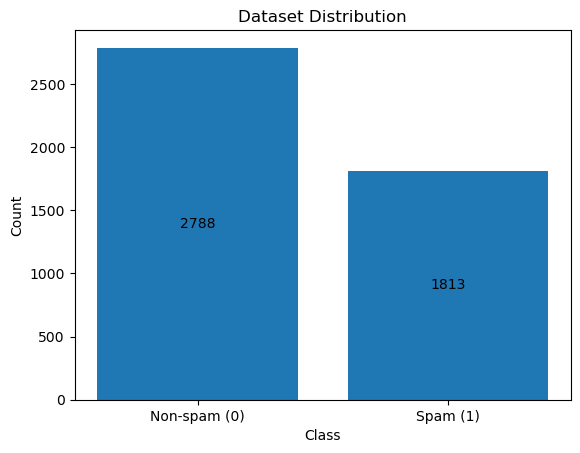

In [9]:
import matplotlib.pyplot as plt
print(f"\nNot-spam: {sum(y==0)}, Spam: {sum(y==1)}")
ham_count = sum(y == 0)
spam_count = sum(y == 1)
plt.figure()
bars = plt.bar(['Non-spam (0)', 'Spam (1)'], [ham_count, spam_count])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, 
             str(int(height)), ha='center', va='center')
plt.title('Dataset Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=42,stratify=y)

In [12]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [13]:
predictions = nb.predict(X_test)

In [14]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.8338762214983714


In [15]:
def conf_matrix(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

tp, tn, fp, fn = conf_matrix(y_test, predictions)

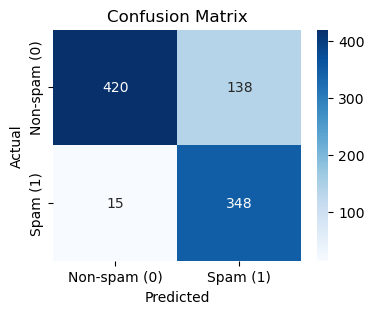

In [16]:
import seaborn as sns
cm = np.array([[tn, fp],
               [fn, tp]])

plt.figure(figsize=(4, 3)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')  
plt.xlabel('Predicted') 
plt.ylabel('Actual')  
plt.xticks([0.5, 1.5], ['Non-spam (0)', 'Spam (1)'])
plt.yticks([0.5, 1.5], ['Non-spam (0)', 'Spam (1)'])
plt.show() 

In [17]:
accuracy = (tp + tn) / cm.sum()
print("\nNaive Bayes classification accuracy", accuracy)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)


Naive Bayes classification accuracy 0.8338762214983714
True Positives: 348
True Negatives: 420
False Positives: 138
False Negatives: 15


In [18]:
#Discussion

Accuracy is 83.4%, meaning 83 out of 100 emails are correctly classified. The model correctly identified 348 spam emails and 420 non-spam emails. However, it made 138 mistakes by marking good emails as spam, and missed 15 spam emails. So while most emails are handled correctly, about 1 in 6 legitimate emails gets incorrectly filtered to spam.

In [19]:
tp, tn, fp, fn = conf_matrix(y_test, predictions)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print("Precision:", precision)
print("Recall:   ", recall)
print("F1-Score: ", f1)

Precision: 0.7160493827160493
Recall:    0.9586776859504132
F1-Score:  0.8197879858657243


In [20]:
# Discussion

To calculate precision, recall, and F1-score, we start with the confusion matrix results. From the model, we have 348 true positives (correctly identified spam), 138 false positives (legitimate emails marked as spam), and 15 false negatives (spam emails missed). Precision tells how accurate our spam predictions are. We calculate it by dividing true positives by all predicted spam emails, which gives us 348 ÷ (348 + 138) = 0.716. This means when the model says an email is spam, it's correct about 71.6% of the time.

Recall measures how much actual spam we catch. We calculate it by dividing true positives by all actual spam emails, which is 348 ÷ (348 + 15) = 0.959. This shows the model catches 95.9% of all spam emails. The F1-score balances these two metrics. We calculate it using the formula 2 × (precision × recall) ÷ (precision + recall), which gives us 2 × (0.716 × 0.959) ÷ (0.716 + 0.959) = 0.820. This single number of 0.820 represents the overall performance balance between precision and recall.